Part A:
1. Find the url for the mtcars dataset from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.htmlLinks to an external site.. Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data using pandas read_csv function. https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csvLinks to an external site.
2. Display the first five rows of the data.
3. For each category in the cyl column, calculate the average mpg for all cars with that cyl value.
4. Create a histogram using the mpg column.
5. Choose two variables in the data and create a scatterplot.


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
df.head(5)

,rownames,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.groupby('cyl')[['mpg']].mean()

,mpg
cyl,
4,26.663636
6,19.742857
8,15.100000


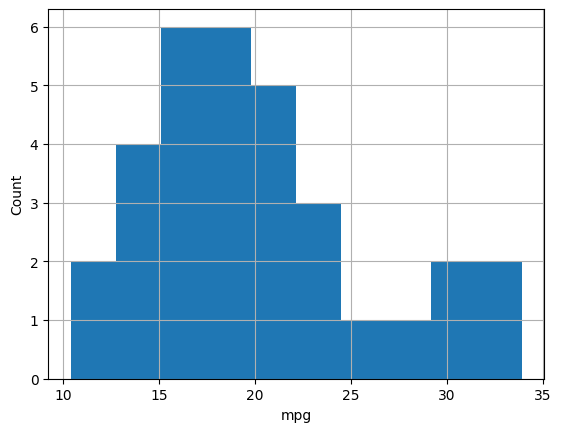

In [4]:
import matplotlib.pyplot as plt
df['mpg'].hist()
plt.xlabel('mpg')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'mpg')

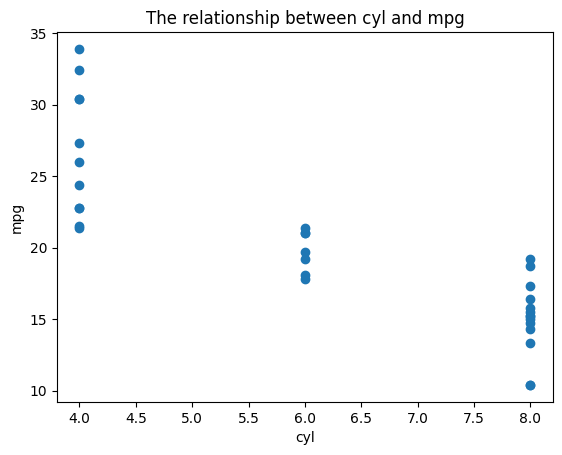

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['cyl'], df['mpg'])
plt.title("The relationship between cyl and mpg")
plt.xlabel("cyl")
plt.ylabel("mpg")

Part B:
1. Find a tabular dataset that interests you that has "tidy" data. Tidy data has data that is ready for your data analysis.  For our tasks we want something where columns represent variables and rows represent unique observations.  Give a brief description of the dataset.  Provide a citation of the dataset (any format is fine).
2. Display the first five rows of the data.
3. Create a visualization using one or two variables from this data.

## Introduction of the dataset:
This dataset contains interview results from individuals, including their age, gender, voting preferences, evaluations of both national and household economic conditions, attitude towards political candidates, and self-assesed political knowledge.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/BEPS.csv')
df.head(10)

,rownames,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
0,1,Liberal Democrat,43,3,3,4,1,4,2,2,female
1,2,Labour,36,4,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,3,2,male
3,4,Labour,24,4,2,2,1,3,4,0,female
4,5,Labour,41,2,2,1,1,4,6,2,male
5,6,Labour,47,3,4,4,4,2,4,2,male
6,7,Liberal Democrat,57,2,2,4,4,2,11,2,male
7,8,Labour,77,3,4,4,1,4,1,0,male
8,9,Labour,39,3,3,4,4,4,11,0,female
9,10,Labour,70,3,2,5,1,1,11,2,male


,count
gender,
female,812
male,713


Text(0.5, 0, 'gender')

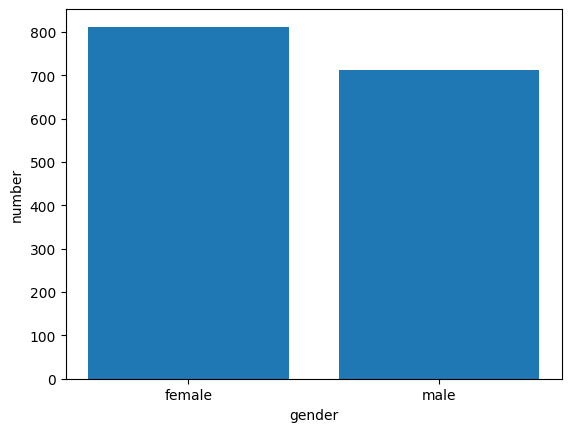

In [7]:
import matplotlib.pyplot as plt
df['count'] = 1
df.head(10)
gender_vector = df.groupby('gender')[['count']].sum()
display(gender_vector)
plt.bar(gender_vector.index, gender_vector['count'])
plt.ylabel("number")
plt.xlabel("gender")

,count
vote,
Conservative,462
Labour,720
Liberal Democrat,343


Text(0.5, 0, 'vote for')

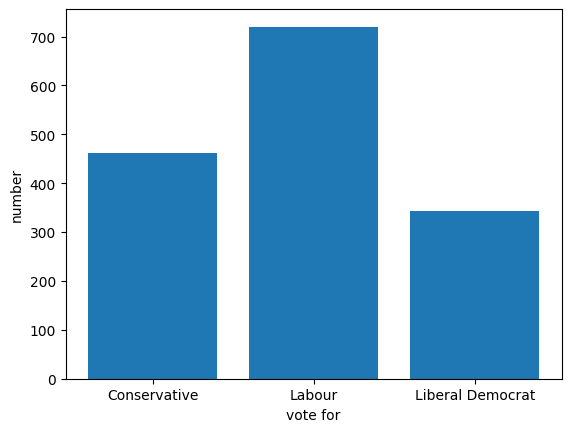

In [8]:
vote_vector = df.groupby('vote')[['count']].sum()
display(vote_vector)
plt.bar(vote_vector.index, vote_vector['count'])
plt.ylabel("number")
plt.xlabel("vote for")

vote              gender
Conservative      female    259
                  male      203
Labour            female    372
                  male      348
Liberal Democrat  female    181
                  male      162
Name: gender_sum, dtype: int64

Text(0, 0.5, 'Count')

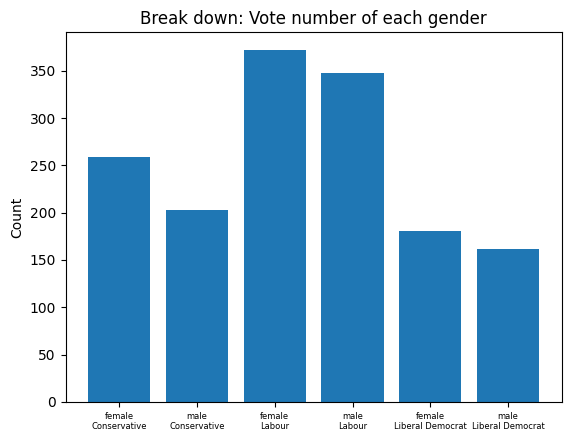

In [35]:
import matplotlib.pyplot as plt
df['gender_sum'] = df['gender']
gender_vector1 = df.groupby(['vote','gender'])['gender_sum'].count()
display(gender_vector1)
gender_vector1 = gender_vector1.reset_index()
gender_vector1['label'] = gender_vector1['gender'] + '\n' + gender_vector1['vote']
plt.bar(gender_vector1['label'], gender_vector1['gender_sum'])
plt.xticks(fontsize = 6)

plt.title("Break down: Vote number of each gender")
plt.ylabel("Count")